In [43]:
#utf-8
import pandas as pd
import time
import numpy as np
import datetime as dt

file = pd.read_csv("C:/Users/Administrator/Desktop/hackerim_00.csv", sep='\\001', header=None, encoding='utf-8', names=['application',
                'authaccount','from_id','to_id','content','capture_time','username','password','groupnum','data_source','action'])
df = pd.DataFrame(file)

keys = ['游戏','封盘','传奇版本','挂牌','数据线','复、制','复制','淘宝','淘、宝','模拟器','领券','淘口令','破解版','群公告','本群须知','血量','余粮','粮库',
       '主动加你','攻击无效','攻击成功','骗','箱子','怪','机器人','箱子','属性','宝贝','快递','包邮','天猫','店','爆率','倍数','伤害','装备','玩家','链接','战斗胜负',
       '战士','跨区','角色','魔法','发起攻击','元宝','主动交易','语言攻击','未受到攻击','有内','F盘','核对','观战','账单','平板电脑','详情如下','当天攻击','无视攻击',
       '数据结构','课程设计','参考','股票','期货','下豬','亲','小仙女','code','特码','已攻击','商家码','挂机','攻击力','流水','user','急出','开始攻击','账D',
        '大量收私人','衣服','技能','压枪','人身','大数据','投票','招聘','后台','财务','新手说明','模糊问','职业完美','招呼号','等级','灵宠','攻击时间','账丹','连中',
       '走砍','交易地点','開獎','注','公益服','代购','换货','欢迎','套装','积分','经验','道具','破解软件','辅助','薪资','信息发布','数据为准','查道',' ZD','取消',
       '文明','精灵','禁止战争','特洛伊','以下数据','问答数据','邀请数据','攻击方式','点开放大','厄运','小萌','宠物','进攻数据','暴击','py交易','快件','订单','00',
       '攻击内容','无法','清空','金币']

    
def key_filter(x):
    if int(x) == 0:
        return 0
    try:
        for i in keys:
            if i in x:
                return 0
            else:
                return 1
    except:
        return 0
    
def anti_class(x):
    if type(x) != str:
        return 1
    if x == "\\N":
        return 1
    for i in keys:
        try:
            if i in x:
                return 1
        except:
            return 0
    return 0
    
def switchtime(x):
    try:
        timeArray = time.localtime(int(x))
        return time.strftime("%Y-%m-%d %H:%M:%S", timeArray)
    except:
        return 0
    
def id15_18(id_card):
    id_card = str(id_card)
    try:
        year =int(id_card[6:8])
        year_now = int(dt.datetime.now().strftime('%Y'))-2000
        if year > year_now:
            id_card_temp = id_card[0:6]+'19'+id_card[6:]   #补齐日期码
        else:
            id_card_temp = id_card[0:6]+'20'+id_card[6:]   #补齐日期码 
        a =np.array(list(map(int, id_card_temp)))
        b = np.array((7,9,10,5,8,4,2,1,6,3,7,9,10,5,8,4,2))
        last_number_temp = np.dot(a,b)%11
        check_code_list = ("1", "0", "X", "9", "8", "7", "6", "5", "4", "3", "2")
        check_code = check_code_list[last_number_temp]
        id_number =id_card_temp+ str(check_code)
        return id_number
    except:
        return 0


df['tmp'] = df['content'].str.len()
df = df.loc[df.tmp>3,]
df['tmp'] = df['content'].apply(anti_class)
df = df.loc[df.tmp<1,]
df['time'] = df['capture_time'].apply(switchtime)
df['sfz'] = df['authaccount'].apply(id15_18)
df.drop(['tmp','capture_time'],axis=1, inplace=True)

writer = pd.ExcelWriter("C:/Users/Administrator/Desktop/hackerim0.xlsx", engine='xlsxwriter',options={'strings_to_urls':False})
writer.book.strings_to_urls = False
df.to_excel(writer, 'Sheet1')
writer.save()
print(1)

d:\python35\lib\site-packages\ipykernel_launcher.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


1


In [14]:
import pandas as pd

file = pd.read_excel('C://Users/Administrator/Desktop/hacker7.xlsx',sheet_name='Sheet1', names=['application',
                'authaccount','from_id','to_id','content','username','groupnum','data_source','action','time','sfz'])
df = pd.DataFrame(file)

# keys = ['以上数据','区','魔','攻击力','影','防御','片名','软件','影','数据','商务小曾','查','当前无攻击','爆','生命','宝石','交易所','物理','拒绝',
#        '交易','语言','语音','引流','余','自动攻击','死爹妈','法术','云顶','NC','BOT','bot','nc','老师','低','BOSS','boss','攻速','禁止','多少攻击','白字',
#        '额外攻击','高攻击','法师','buff','BUFF','攻击范围','攻击速度','狗粮','护甲','攻击距离','同时攻击','黑客帝国','全屏攻击','免疫攻击']

# keys = ['攻击上限','减速','攻击多少','剪刀','分裂','人身','人生','武器','掉帧','内购','防具','饰品','手饰','周卡','月卡','双手攻击','单手','力量','星岩','手套',
#        '敏捷','回血','破灭','眼饰']

# keys = ['面板','单机','群体','受','多重','基础','体育','禁言','性','普通','被动','死堆','骑士','级','攻击信息','小号','粮','狼','狮','狗主宰','孤','古','骨','顾',
#        '成功攻击','正版','纯攻击','感觉攻击','基础攻击','阅读','流放','流畅','帮派攻击','我草','转让物品']

# keys = ['攻击','免费']
# keys = ['盗号的','歌曲','盗号死','被盗号','末日','末世','收租微信','司马','申述','破解','打不过狗']
# keys = ['盗号','洗号','站街','站票']
keys = ['建站','铁线虫','种族入侵','黑客入侵','黑客是','黑客太','黑客挺','吃过','带过','打过','见过狗','见识过狗','开入侵','看过狗','看见过狗','打得过',
       '打的过','打入侵','全自动风行','文化入侵','物种入侵','抓鸡']

def anti_class(x):
    if type(x) != str:
        return 1
    if x == "\\N":
        return 1
    for i in keys:
        try:
            if i in x:
                return 1
        except:
            return 0
    return 0

df['tmp'] = df['content'].apply(anti_class)
df = df.loc[df.tmp<1,]
df.drop(['tmp'],axis=1, inplace=True)

writer = pd.ExcelWriter("C:/Users/Administrator/Desktop/hacker8.xlsx", engine='xlsxwriter',options={'strings_to_urls':False})
writer.book.strings_to_urls = False
df.to_excel(writer, 'Sheet1')
writer.save()
print(1)

1


In [7]:
import pandas as pd
import jieba

file = pd.read_excel('C://Users/Administrator/Desktop/hacker8.xlsx',sheet_name='Sheet1', names=['application',
                'authaccount','from_id','to_id','content','username','groupnum','data_source','action','time','sfz'])
df = pd.DataFrame(file)

keywords = r'C://Users/Administrator/Desktop/hackerkeyword.txt'
jieba.load_userdict(keywords)
keyword=list(pd.read_table(keywords,header=None)[0])
jieba.add_word('cc攻击')
jieba.add_word('CC攻击')
def keyword_count(content):
    words=list(jieba.cut(content,cut_all=True))
    count_dict,key_list={},[]
    for i in keyword:
        a=words.count(i)
        if a>0:
            count_dict[i]=a
            key_list.append(i+'('+str(a)+')')
    return [len(count_dict),sum(count_dict.values()),';'.join(key_list)]

df['result']=df['content'].apply(keyword_count)
df['word_types']=df['result'].apply(lambda x:x[0])
df['word_counts']=df['result'].apply(lambda x:x[1])
df['keywords']=df['result'].apply(lambda x:x[2])
df=df.sort_values(by=['word_types','word_counts'],ascending=False)

writer = pd.ExcelWriter("C:/Users/Administrator/Desktop/hackerstatic.xlsx", engine='xlsxwriter',options={'strings_to_urls':False})
writer.book.strings_to_urls = False
df.to_excel(writer, 'Sheet1')
writer.save()
print(1)

1


团体数:  2745
最大子团体成员数:  3061
拔点后最大子团伙成员数:  1047


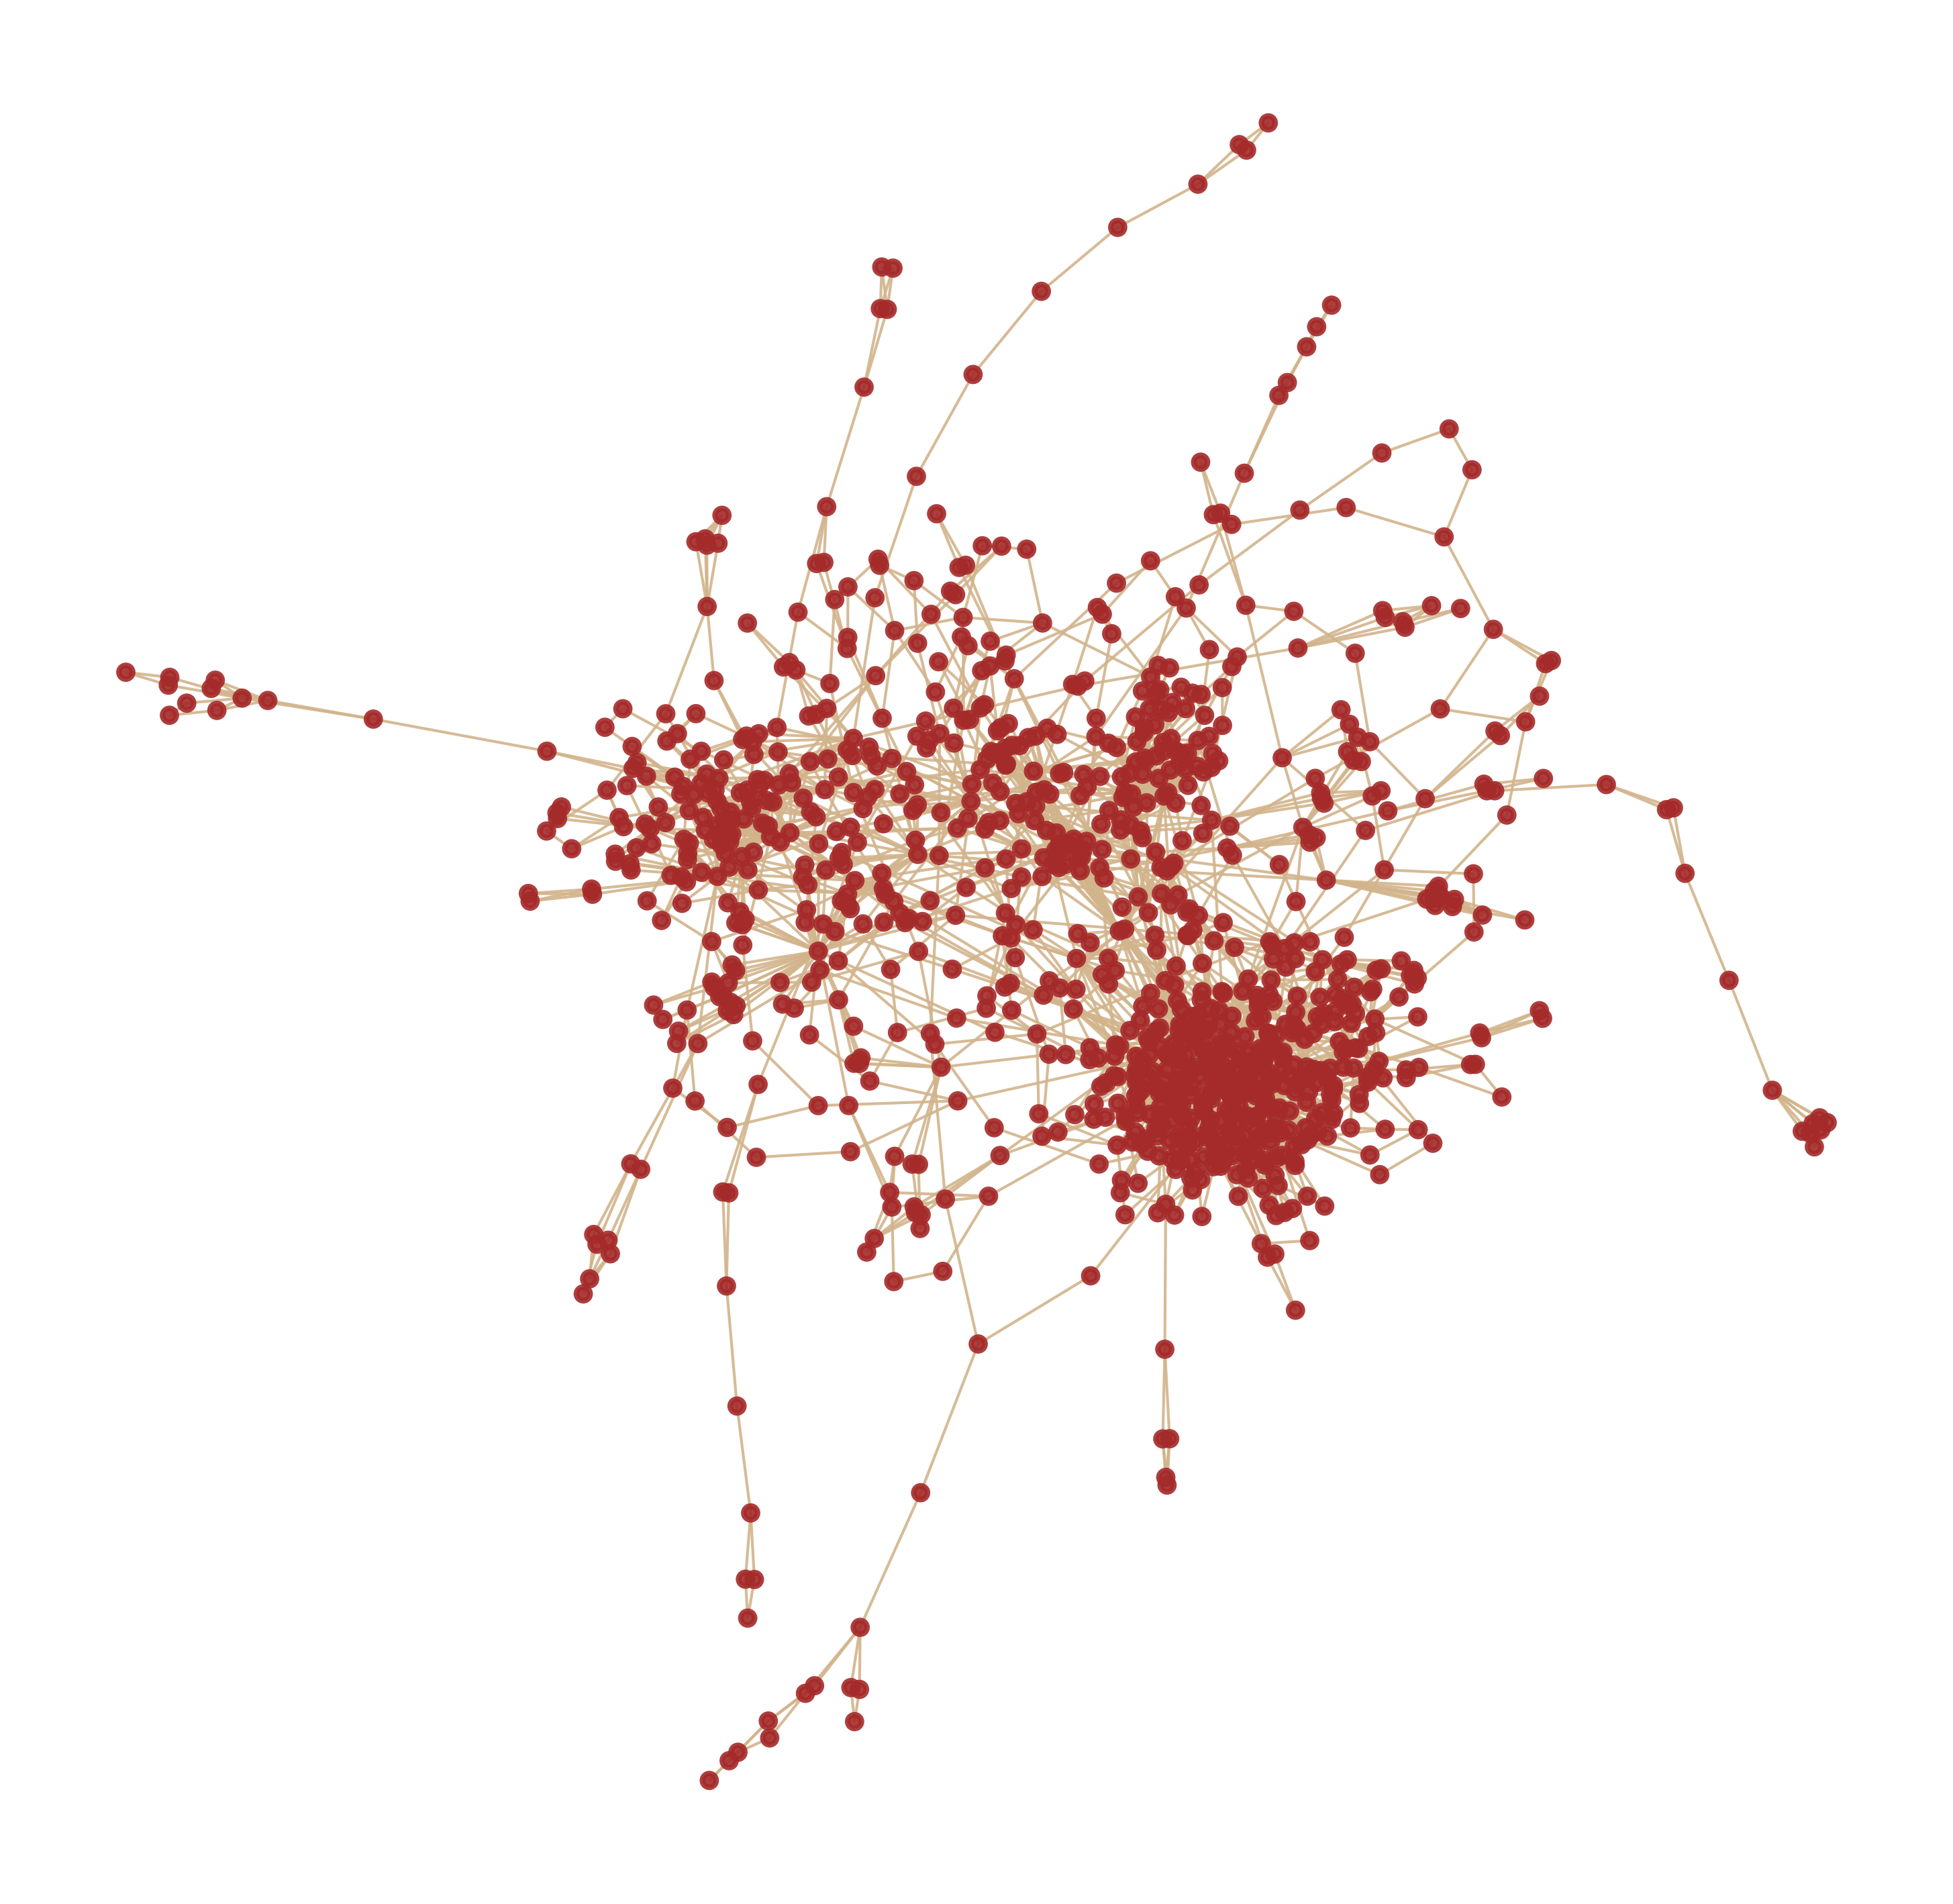

In [9]:
#utf-8
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from networkx.drawing.nx_agraph import graphviz_layout

plt.rcParams['figure.figsize'] = (6,6)
plt.rcParams['savefig.dpi'] = 600
plt.rcParams['figure.dpi'] = 600

file = pd.read_excel('C://Users/Administrator/Desktop/hacker8.xlsx',sheet_name='Sheet2', names=['authid','from_id','to_id'])
df = pd.DataFrame(file)

DG = nx.from_pandas_edgelist(df, source='from_id', target='to_id')
DG.add_nodes_from(df['from_id'].tolist(), color='Brown')
DG.add_nodes_from(df['to_id'].tolist(), color='Brown')
# pos = nx.kamada_kawai_layout(DG)
# node_color = [DG.node[v]['color'] for v in DG]
# nx.draw_networkx(DG, node_color=node_color, node_size=2,font_size=2, width=0.4, edge_color='Tan', alpha = 0.9, with_labels=False)
print("团体数: ",len(list(nx.connected_component_subgraphs(DG))))

GC = max(nx.connected_component_subgraphs(DG),key=len)
print("最大子团体成员数: ",GC.number_of_nodes())

# ax = plt.gca()
# ax.set_axis_off()
# ax.set_xticks([])
# ax.set_yticks([])
# plt.savefig("C://Users/Administrator/Desktop/all.png", format="PNG")
# plt.show()

def circulate_del(GC):
    ret = 0
    lst = []
    for x in nx.degree(GC):
        if x[1]<2:
            lst.append(x[0])
    for i in range(len(lst)):
        GC.remove_node(lst[i])
        ret += 1
    return ret

while(circulate_del(GC) > 0):
    circulate_del(GC)
    
with open('C://Users/Administrator/Desktop/最大子团伙拔点后.txt', 'w') as p:
    for x in nx.degree(GC):
        p.write(str(x[0]))
        p.write("\n")

# print("拔点后团体数: ", len(list(nx.connected_component_subgraphs(DG))))
print("拔点后最大子团伙成员数: ",GC.number_of_nodes())
pos = nx.kamada_kawai_layout(GC)
node_color = [GC.node[v]['color'] for v in GC]
nx.draw_networkx(GC, node_color=node_color, node_size=6,font_size=6, width=0.5, edge_color='Tan', alpha = 0.9, with_labels=False)

ax = plt.gca()
ax.set_axis_off()
ax.set_xticks([])
ax.set_yticks([])
plt.savefig("C://Users/Administrator/Desktop/拔点后.png", format="PNG")
plt.show()

In [11]:
import pandas as pd

file = pd.read_excel('C://Users/Administrator/Desktop/hacker8.xlsx',sheet_name='Sheet1', names=['application',
                'authaccount','from_id','to_id','content','username','groupnum','data_source','action','time','sfz'])
df = pd.DataFrame(file)

importQQ = [line.strip() for line in open("C://Users/Administrator/Desktop/最大子团伙拔点后.txt", 'r', encoding="UTF-8").readlines()]

df1 = df.loc[df['from_id'].isin(importQQ)]
df2 = df.loc[df['to_id'].isin(importQQ)]

df = pd.merge(df1,df2,how='outer')
df.drop_duplicates(keep='first',inplace=True)

writer = pd.ExcelWriter("C:/Users/Administrator/Desktop/hacker_tmp.xlsx", engine='xlsxwriter',options={'strings_to_urls':False})
writer.book.strings_to_urls = False
df.to_excel(writer, 'Sheet1', index=False)
writer.save()
print(1)

1


In [9]:
import pandas as pd

file1 = pd.read_csv("C:/Users/Administrator/Desktop/qq_auth.csv", sep='\\001', engine='python', header=None, encoding='utf-8', names=['authtype','authid','appid','datasource'])
df1 = pd.DataFrame(file1)
# df1.dropna(axis='index',how='any',subset=[1,2], inplace=True)
# print(df1.dtypes)

file2 = pd.read_csv("C:/Users/Administrator/Desktop/auth_mac.csv", sep='\\001', engine='python', header=None, encoding='utf-8', names=['equipment_id', 'authid'])
df2 = pd.DataFrame(file2)
df2.dropna(axis='index',how='any', inplace=True)
# print(df2.dtypes)

file3 = pd.read_csv("C:/Users/Administrator/Desktop/flattenauth.csv", sep='\\001', engine='python', header=None, encoding='utf-8', names=['equipment_id', 'authid'])
df3 = pd.DataFrame(file3)
df3.dropna(axis='index',how='any', inplace=True)
# print(df3.dtypes)

# file4 = pd.read_csv("C:/Users/Administrator/Desktop/qq_auth.csv", sep='\\001', header=None, encoding='utf-8', names=['flattenappid', 'authid'])
# df4 = pd.DataFrame(file4)
# print(df4.dtypes)
# df4 = df4.apply(pd.to_numeric,axis=1)

df1 = df1[['appid','authid']]
df1.dropna(axis='index',how='any', inplace=True)
df12 = df1.merge(df2, on='authid', how='left')
df12 = df12[['appid', 'equipment_id']]
df12.dropna(axis='index',how='any', inplace=True)

df23 = df12.merge(df3, on='equipment_id', how='left')
df23 = df23[['appid', 'authid']]
df23.dropna(axis='index',how='any', inplace=True)
df23.drop_duplicates(keep='first',inplace=True)
df23['authid'] = df23['authid'].astype(str)

# df = df23.groupby(by='appid').apply(lambda x: ';'.join(x['authid']))
# df11 = pd.DataFrame({'df23':df23['appid']})
# df22 = pd.DataFrame({'df':df})
# reg = df11.merge(df22, left_index=True, right_index=True, how='left')
# reg.reset_index(inplace=True)

# df34 = df23.merge(df4, on='authid', how='left')
# df34 = df34[['appid', 'flattenappid']]
# print(df34.dtypes)
# df = d34.groupby(by='appid').apply(lambda x: ','.join(x['flattenappid']))

writer = pd.ExcelWriter("C:/Users/Administrator/Desktop/onemachine.xlsx", engine='xlsxwriter',options={'strings_to_urls':False})
writer.book.strings_to_urls = False
df23.to_excel(writer, 'Sheet1', index=False)
writer.save()
print(1)

1


In [16]:
import pandas as pd

file = pd.read_excel('C://Users/Administrator/Desktop/onemachine.xlsx',sheet_name='Sheet1', names=['appid','authid'])
df = pd.DataFrame(file)
df['authid'] = df['authid'].astype(str)
df11 = df.groupby('appid', group_keys=False).apply(lambda x: ';'.join(x['authid']))

df22 = df.groupby(['appid'])['authid'].count()
df11 = pd.DataFrame({'df11':df11})
df22 = pd.DataFrame({'df22':df22})
reg = df22.merge(df11, left_index=True, right_index=True, how='left')
reg.reset_index(inplace=True)

writer = pd.ExcelWriter("C:/Users/Administrator/Desktop/tmp.xlsx", engine='xlsxwriter',options={'strings_to_urls':False})
writer.book.strings_to_urls = False
reg.to_excel(writer, 'Sheet1', index=False)
writer.save()
print(1)

1
